<a href="https://colab.research.google.com/github/titirat-s/data-science-bootcamp9/blob/main/NetflixAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix analysis

## Import library

In [173]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import seaborn as sns

## Import dataset

In [180]:
csvfile = "/Netflix Engagement (plus).csv"

df = pd.read_csv(csvfile)
df.head(3)

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"['Biography', 'Drama', 'History']","persian empire,empire,5th century b.c.,achaeme...",NaN
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"['Comedy', 'Drama', 'Romance']","producer,three word title,headstrong,arranged ...",The film follows headstrong Ginny who meets Su...
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,['Short'],NaN,NaN


In [181]:
print( 'Dataframe have ' + str(df.shape[0]) + ' rows, and ' + str(df.shape[1]) + ' columns. There are '+ str(df.size) + ' cells.')

Dataframe have 18332 rows, and 9 columns. There are 164988 cells.


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18332 entries, 0 to 18331
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                18332 non-null  object 
 1   Available Globally?  18332 non-null  object 
 2   Release Date         4879 non-null   object 
 3   Hours Viewed         18332 non-null  int64  
 4   Number of Ratings    14222 non-null  float64
 5   Rating               14222 non-null  float64
 6   Genre                15761 non-null  object 
 7   Key Words            12801 non-null  object 
 8   Description          10619 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.3+ MB


Select only 6 column

In [183]:
df = df.iloc[:, 0:7]
list(df.columns)

['Title',
 'Available Globally?',
 'Release Date',
 'Hours Viewed',
 'Number of Ratings',
 'Rating',
 'Genre']

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18332 entries, 0 to 18331
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                18332 non-null  object 
 1   Available Globally?  18332 non-null  object 
 2   Release Date         4879 non-null   object 
 3   Hours Viewed         18332 non-null  int64  
 4   Number of Ratings    14222 non-null  float64
 5   Rating               14222 non-null  float64
 6   Genre                15761 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1002.7+ KB


##Data cleansing

*  Check if duplicate
*  Check if NULL
*  Change date format


### Duplicated value

In [185]:
# Check duplicated values from Title
df[df.duplicated(['Title'])]

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre
271,We Can Be Heroes,Yes,2020-12-25,52800000,16708.0,4.7,"['Action', 'Comedy', 'Drama']"
340,A Beautiful Life,Yes,2023-06-01,45700000,6676.0,6.4,"['Drama', 'Music', 'Romance']"
390,Unlocked // 스마트폰을 떨어뜨렸을 뿐인데,Yes,2023-02-17,42500000,9011.0,6.4,"['Crime', 'Drama', 'Mystery']"
679,The Swimmers,Yes,2022-11-23,28800000,34380.0,7.4,"['Biography', 'Drama', 'Sport']"
747,Noise,Yes,2023-03-17,27300000,3845.0,3.5,"['Drama', 'Mystery', 'Thriller']"
...,...,...,...,...,...,...,...
17892,The Wedding // Liam dan Laila,No,NaN,100000,159745.0,6.9,"['Comedy', 'Music', 'Romance']"
18156,Way Back Home // 비밀의 정원,No,NaN,100000,100.0,7.1,['Drama']
18162,We Can Be Heroes // Bäst i Sverige,No,NaN,100000,16708.0,4.7,"['Action', 'Comedy', 'Drama']"
18242,Wolf // Varg,No,NaN,100000,59517.0,6.3,"['Drama', 'Horror', 'Romance']"


> From original dataframe, There are 118 duplicated values by title name.\
> Delete all duplicate value to increase data accuracy.


In [186]:
# Remove duplicate rows
df.drop_duplicates("Title", inplace=True)
df

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"['Biography', 'Drama', 'History']"
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"['Comedy', 'Drama', 'Romance']"
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,['Short']
3,Wednesday: Season 1,Yes,2022-11-23,507700000,NaN,NaN,['Talk-Show']
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,50077.0,7.4,"['Drama', 'History', 'Romance']"
...,...,...,...,...,...,...,...
18327,راس السنة,No,NaN,100000,383.0,4.8,['Drama']
18328,心が叫びたがってるんだ。,No,NaN,100000,6209.0,7.3,"['Animation', 'Drama', 'Family']"
18329,두근두근 내 인생,No,NaN,100000,NaN,NaN,NaN
18330,라디오 스타,No,NaN,100000,NaN,NaN,NaN


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18214 entries, 0 to 18331
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                18214 non-null  object 
 1   Available Globally?  18214 non-null  object 
 2   Release Date         4855 non-null   object 
 3   Hours Viewed         18214 non-null  int64  
 4   Number of Ratings    14114 non-null  float64
 5   Rating               14114 non-null  float64
 6   Genre                15653 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.1+ MB


> From dataset before delete duplicate value, There are 118 duplicate values within 18,332 rows in dataset.
After check and remove duplicate value, dataset still contain 18,214 rows.

### Null value

In [188]:
# Check any null value
df.isnull().sum()

Title                      0
Available Globally?        0
Release Date           13359
Hours Viewed               0
Number of Ratings       4100
Rating                  4100
Genre                   2561
dtype: int64

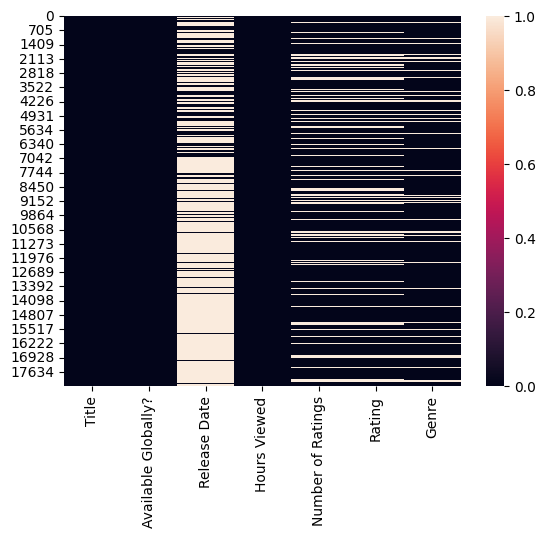

In [189]:
# Showing null value with heatmap
sns.heatmap(df.isnull());


> There are 4 columns having null value - Number of Rating, Rating, and Genre. and heat map show frequency of null value in column



Replace nan value from column 'Genre' with 'Other'

In [190]:
# Replace null value from 'Genre' column with 'Other'
df["Genre"] = df["Genre"].fillna("Other")

In [191]:
# 2nd Check any null value
df.isnull().sum()

Title                      0
Available Globally?        0
Release Date           13359
Hours Viewed               0
Number of Ratings       4100
Rating                  4100
Genre                      0
dtype: int64

> Replace null value in column 'Genre' with 'Other' to add another group.
There are no null value left in column 'Genre'.

### Datetime - Format

In [192]:
# Change Release Date from string to datetime format

df["Release Date"] = pd.to_datetime(df['Release Date'], format='%Y/%m/%d')
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"['Biography', 'Drama', 'History']"
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"['Comedy', 'Drama', 'Romance']"
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,['Short']
3,Wednesday: Season 1,Yes,2022-11-23,507700000,NaN,NaN,['Talk-Show']
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,50077.0,7.4,"['Drama', 'History', 'Romance']"


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18214 entries, 0 to 18331
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                18214 non-null  object        
 1   Available Globally?  18214 non-null  object        
 2   Release Date         4855 non-null   datetime64[ns]
 3   Hours Viewed         18214 non-null  int64         
 4   Number of Ratings    14114 non-null  float64       
 5   Rating               14114 non-null  float64       
 6   Genre                18214 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 1.1+ MB


> From dataset before convert date format, 'Release Date' is contain object that can't extract to period.
After convert into datetime, Able to use 'Release Date' with period.

## Exploratory Data Analysis

*   Descriptive Statistics [Distribution & Variable]
*   Graphic [Histogram, Boxplot, Scatter plot/ Scatterplot metrix]

In [194]:
## Using descriptive statistics to check that value is in normal range

df.describe(include='all')

<ipython-input-194-c2c9c9ee2216>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre
count,18214,18214,4855,1.821400e+04,1.411400e+04,14114.000000,18214
unique,18214,2,1665,NaN,NaN,NaN,680
top,The Night Agent: Season 1,No,2020-03-20 00:00:00,NaN,NaN,NaN,Other
freq,1,13700,16,NaN,NaN,NaN,2561
first,NaN,NaN,2010-04-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,2023-06-30 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,5.130954e+06,4.624689e+04,6.510401,NaN
std,NaN,NaN,NaN,1.871767e+07,1.491234e+05,1.227320,NaN
min,NaN,NaN,NaN,1.000000e+05,5.000000e+00,1.200000,NaN
25%,NaN,NaN,NaN,2.000000e+05,3.392500e+02,5.800000,NaN


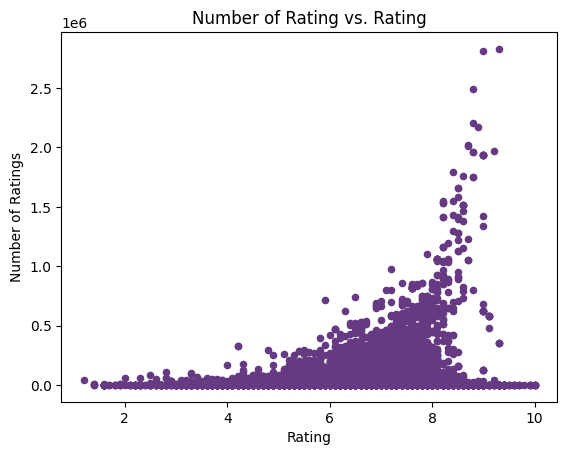

In [195]:
## Check Rating and Number of Rating outlier with scatter plot

df[['Number of Ratings', 'Rating']] \
    .plot(x= 'Rating', y='Number of Ratings', kind='scatter', \
          color="#663a82" , title="Number of Rating vs. Rating");

> Check Outlier from rating and look for correlation between 'Rating' and 'Number of Rating'

## Explode Genre

In [196]:
df.head(3)

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"['Biography', 'Drama', 'History']"
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"['Comedy', 'Drama', 'Romance']"
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,['Short']


> From Genre column, There are include multi genre in one column.\
I will explode them into 1 genre to summarize Rating by genre

In [197]:
# Split text from column 'Genre' to series in new column 'spl_Genre'

df["spl_Genre"] = df["Genre"].str.replace( "[", "" ).str.replace("]", "").str.replace("'", "").str.split(", ")
df.head()

<ipython-input-197-edd907c34abc>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["spl_Genre"] = df["Genre"].str.replace( "[", "" ).str.replace("]", "").str.replace("'", "").str.split(", ")


,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,spl_Genre
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"['Biography', 'Drama', 'History']","[Biography, Drama, History]"
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"['Comedy', 'Drama', 'Romance']","[Comedy, Drama, Romance]"
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,['Short'],[Short]
3,Wednesday: Season 1,Yes,2022-11-23,507700000,NaN,NaN,['Talk-Show'],[Talk-Show]
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,50077.0,7.4,"['Drama', 'History', 'Romance']","[Drama, History, Romance]"


In [198]:
# Check type
type(df["spl_Genre"])

pandas.core.series.Series

> Genre become series already!

Explode list

In [199]:
## Insert Index to movies before explode

df["movie_id"] = df.index
df.head(3)

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,spl_Genre,movie_id
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"['Biography', 'Drama', 'History']","[Biography, Drama, History]",0
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"['Comedy', 'Drama', 'Romance']","[Comedy, Drama, Romance]",1
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,['Short'],[Short],2


In [200]:
## Explode list

df2 = df.explode("spl_Genre")
df2.head(7)

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,spl_Genre,movie_id
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"['Biography', 'Drama', 'History']",Biography,0
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"['Biography', 'Drama', 'History']",Drama,0
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"['Biography', 'Drama', 'History']",History,0
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"['Comedy', 'Drama', 'Romance']",Comedy,1
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"['Comedy', 'Drama', 'Romance']",Drama,1
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"['Comedy', 'Drama', 'Romance']",Romance,1
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,['Short'],Short,2


> dataset name 'df2' contained Genre that splited into 1:1 row, Using to analyze movies by single genre.

## Answer the question

### Q1: For the most hours viewed, what is the show title and what genre of the show?

In [201]:
df[df["Hours Viewed"] == df["Hours Viewed"].max()]

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,spl_Genre,movie_id
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"['Biography', 'Drama', 'History']","[Biography, Drama, History]",0


In [202]:
df2[df2["Title"].isin(["The Night Agent: Season 1"])]

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,spl_Genre,movie_id
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"['Biography', 'Drama', 'History']",Biography,0
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"['Biography', 'Drama', 'History']",Drama,0
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"['Biography', 'Drama', 'History']",History,0


> *Answer*: The series have the most hours viewed is **The Night Agent: Season 1**. The genre of these series are **biography, drama, and history**.

### Q2: How many genre in movies & tv shows, what's genre having top 3 largest number of tv-shows and movies, and how many tv-shows and movies in it?

In [206]:
agg_TitlePerGenre = df2.groupby("spl_Genre")["Title"].count().sort_values(ascending=False).reset_index()
agg_TitlePerGenre.columns = ['spl_Genre', 'n_Title']

agg_TitlePerGenre.head()

,spl_Genre,n_Title
0,Drama,6025
1,Comedy,5334
2,Action,2977
3,Other,2561
4,Short,2229


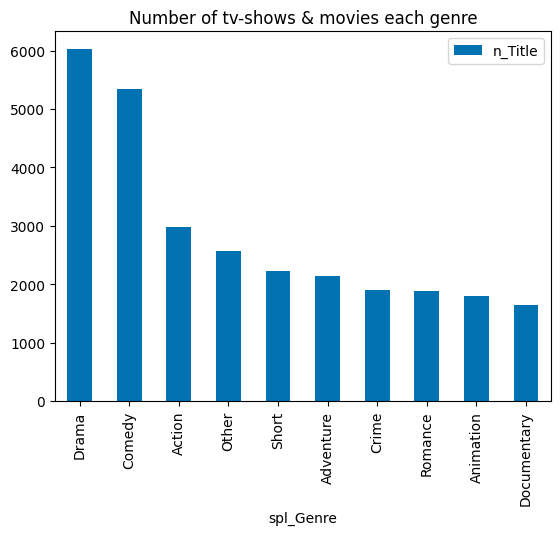

In [205]:
agg_TitlePerGenre.set_index("spl_Genre").head(10)\
    .plot(kind="bar", color="#0072b2", title="Number of tv-shows & movies each genre");

> *Answer*: From dataset, There are **28 genre** of tv-shows and movies. **Drama** having the largest number of tv-shows and movies, There are 6,025 tv-shows and movies. The second genre having largest number of tv-shows and movies is **comedy**,
having 5,334 tv-shows and movies. Follow by **action**, the third having 2,977 tv-shows and movies

There are 28 genre of tv-shows and movies

**Top 3 genre having largest number of tv-shows and movies:**\
🥇Drama:	6,025\
🥈Comedy: 5,334\
🥉Action: 2,977

### Q3: Which genre having highest average rating?

In [207]:
## Finding average rating of tv shows & movies per genre
# Descriptive of 'Rating'

agg_RatingPerGenre = df2.groupby("spl_Genre")["Rating"].agg(["mean", "count", "min", "max", "std"]).round(2)\
    .sort_values(["mean","count"], ascending=False).reset_index()
agg_RatingPerGenre.columns = ['spl_Genre', 'avg_rating', 'n_rating', 'min_rating', 'max_rating', 'std_rating']

agg_RatingPerGenre.head()

,spl_Genre,avg_rating,n_rating,min_rating,max_rating,std_rating
0,Talk-Show,7.55,44,2.1,9.3,1.53
1,Short,7.28,1449,1.6,10.0,1.49
2,Documentary,7.25,1291,1.4,9.9,1.02
3,News,7.21,17,5.6,8.6,1.16
4,Game-Show,7.17,52,4.6,8.8,1.19


In [208]:
# Merge total movie with rating calculated table

genreRating = agg_TitlePerGenre.merge(agg_RatingPerGenre, on='spl_Genre')[["spl_Genre","n_Title","n_rating","avg_rating","std_rating"]]\
   .sort_values("avg_rating", ascending=False).reset_index(drop=True)

genreRating.head()

,spl_Genre,n_Title,n_rating,avg_rating,std_rating
0,Talk-Show,194,44,7.55,1.53
1,Short,2229,1449,7.28,1.49
2,Documentary,1649,1291,7.25,1.02
3,News,62,17,7.21,1.16
4,Game-Show,66,52,7.17,1.19


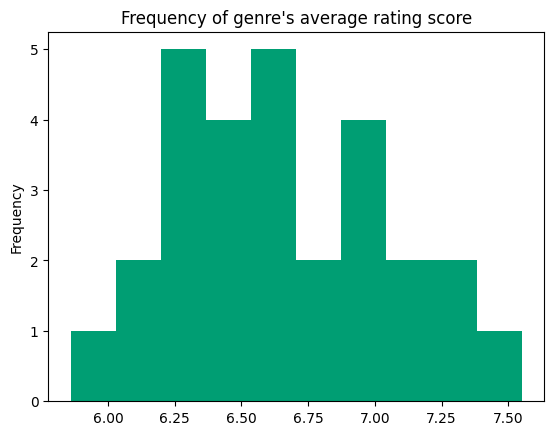

In [209]:
# Histogram show frequency of rating score

genreRating["avg_rating"].plot(kind="hist", bins = 10, color="#009e73", title="Frequency of genre's average rating score");

> *Answer*: The most frequency of genre's average rating score are around 6.25 - 7.00 score point. **Talk-Show** have highest average rating score with **7.55 score point**. There are 44 tv-shows and movies from 194 have rated. The second one is **short** with **7.28 score point** and 1,449 of 2,229 tv-shows and movies have rated. **Documentary** is the third with **7.25 score point**, There are 1291 of 1649 tv-shows and movies have rated.

***Top 3 genre have highest rating score***\
🥇Talk-Show: 7.55\
🥈Short:	7.28\
🥉Documentary:	7.25

### Q4: Which year has highest number of the TV shows & movies were release?

In [210]:
df["Year Release"] = df["Release Date"].dt.year #.value_counts(dropna=False)
df["Year Release"].value_counts()

2022.0    956
2021.0    814
2020.0    779
2019.0    698
2018.0    595
2017.0    361
2023.0    329
2016.0    192
2015.0     79
2014.0     28
2013.0     12
2010.0      8
2011.0      3
2012.0      1
Name: Year Release, dtype: int64

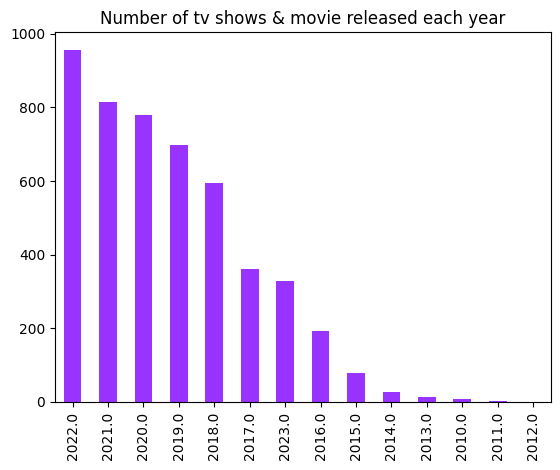

In [211]:
df["Year Release"].value_counts().plot(kind="bar", color="#9933ff" \
                            ,title="Number of tv shows & movie released each year");

> *Answer*: In **2022**, there are highest number of tv show & movies were released total 956 tv shows and movies.

### Q5: Which genre having highest rated tv-shows and movies, and how many people rated in one tv-shows or movies?

In [212]:
## Finding average number of rating of tv shows & movies per genre
# Descriptive of 'Number of Rating'

agg_NoRatingPerGenre = df2.groupby("spl_Genre")["Number of Ratings"].agg(["mean", "count", "sum", "min", "max", "std"]).round(2)\
    .sort_values(["mean","count"], ascending=False).reset_index()
agg_NoRatingPerGenre.columns = ['spl_Genre', 'avg_nRating', 'n_nRating', 'sum_nRating', 'min_nRating', 'max_nRating', 'std_nRating']

agg_NoRatingPerGenre.head()

,spl_Genre,avg_nRating,n_nRating,sum_nRating,min_nRating,max_nRating,std_nRating
0,Sci-Fi,172644.09,478,82523876.0,5.0,2495359.0,288614.83
1,Western,118344.45,60,7100667.0,38.0,1656242.0,317001.80
2,Adventure,94930.52,2076,197075762.0,6.0,2495359.0,222376.65
3,Action,83169.68,2866,238364291.0,5.0,2811102.0,200825.38
4,Fantasy,81902.52,730,59788843.0,6.0,1376722.0,165112.78


In [213]:
## MovieRated proportion

genreNRating = agg_TitlePerGenre.merge(agg_NoRatingPerGenre, on='spl_Genre')[["spl_Genre","n_Title", "n_nRating", "avg_nRating", "sum_nRating", "std_nRating"]]
genreNRating["MovieRated_proportion"] = ((genreNRating["n_nRating"] / genreNRating["n_Title"])*100).round(2)

genreNRating.sort_values("MovieRated_proportion", ascending=False).reset_index(drop=True).head()

,spl_Genre,n_Title,n_nRating,avg_nRating,sum_nRating,std_nRating,MovieRated_proportion
0,Film-Noir,5,5,5752.00,28760.0,3691.85,100.00
1,Crime,1907,1881,72113.58,135645653.0,198061.11,98.64
2,Mystery,912,894,79633.20,71192077.0,173767.40,98.03
3,Romance,1880,1843,37453.86,69027465.0,103907.64,98.03
4,Biography,667,652,68245.76,44496235.0,174745.43,97.75


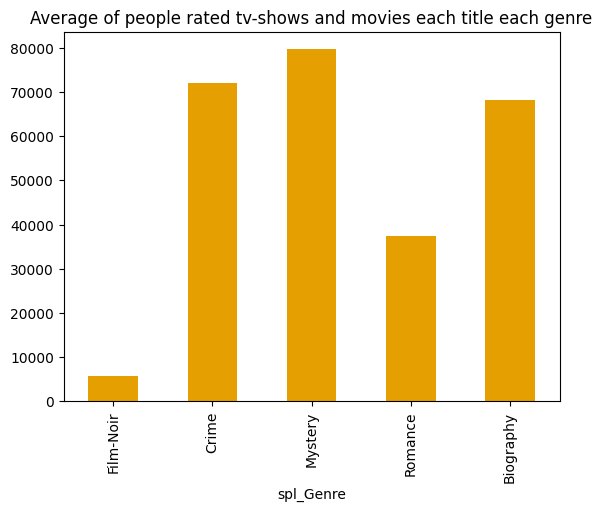

In [214]:
# Plot bar graph
genreNRating.sort_values("MovieRated_proportion", ascending=False).set_index("spl_Genre", drop=True).head()\
  .agg("avg_nRating").plot(kind='bar', color="#e69f00", title="Average of people rated tv-shows and movies each title each genre");

> *Answer*: The genre that having greatest tv-shows and movies rated proportion is **film-noir**, having 100 percent rated and 5,752 people rated each title. The second have 98.64 percent rated with 72,113 people rated each title is **crime**. Follow by **mystery**, the third, have 79,633 people rated per title with 98.03 percent rated equal to **romance** that having 37,453 people rated each title.

**Top 3 with highest title rated each genre**\
🥇 Film-Noir:	title rate 100.00% with 5752 people rated each title\
🥈 Crime:	title rate 98.64% with 72113	people rated each title\
🥉 Mystery: title rate	98.03% with 79633 people rated each title\
🥉 Romance: title rate 98.03% with 37453 people rated each title

### Q6: Show all the tv shows and movies released with top rated genre during 2022 - 2023

In [215]:
# From number of rating assume as how many rating score, there are many viewed too
# from summary number of rating, select top 10 having the most average number of rating score

genreNRating.iloc[0:10, [0,2,3]]

,spl_Genre,n_nRating,avg_nRating
0,Drama,5777,59222.49
1,Comedy,5059,36458.81
2,Action,2866,83169.68
3,Other,31,79.10
4,Short,1449,2501.24
5,Adventure,2076,94930.52
6,Crime,1881,72113.58
7,Romance,1843,37453.86
8,Animation,1680,22794.32
9,Documentary,1291,3936.25


In [216]:
# Put top 10 rated genre in list

top_rated_genre = genreNRating.iloc[0:10, 0]
top_rated_genre

0          Drama
1         Comedy
2         Action
3          Other
4          Short
5      Adventure
6          Crime
7        Romance
8      Animation
9    Documentary
Name: spl_Genre, dtype: object

In [217]:
#Remove 'Other' from list -> replace null value
top_rated_genre.pop(3)
top_rated_genre

0          Drama
1         Comedy
2         Action
4          Short
5      Adventure
6          Crime
7        Romance
8      Animation
9    Documentary
Name: spl_Genre, dtype: object

In [218]:
# Convert year release to new column
df2["Year Release"] = df2["Release Date"].dt.year
df2.head()

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,spl_Genre,movie_id,Year Release
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"['Biography', 'Drama', 'History']",Biography,0,2023.0
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"['Biography', 'Drama', 'History']",Drama,0,2023.0
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"['Biography', 'Drama', 'History']",History,0,2023.0
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"['Comedy', 'Drama', 'Romance']",Comedy,1,2023.0
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"['Comedy', 'Drama', 'Romance']",Drama,1,2023.0


In [219]:
df2[(df2['Year Release'].between(2022,2023)) & (df2['spl_Genre'].isin(top_rated_genre))]\
    .value_counts("Title").reset_index(name='spl_Genre') #.info()

,Title,spl_Genre
0,Deepa & Anoop: Season 2,3
1,The Magician's Elephant,3
2,Shadow and Bone: Season 2,3
3,Seoul Vibe // 서울대작전,3
4,Detective Conan: Zero’s Tea Time: Season 1 // ...,3
...,...,...
995,Ricky Gervais: SuperNature,1
996,Extraordinary Attorney Woo: Season 1 // 이상한 변호...,1
997,Ricardo Quevedo: Tomorrow Will Be Worse // Ric...,1
998,Return to Space,1


> *Answer*: Between 2022 to 2023, There are total **1,000** tv shows and movies released with top genre in data set.

### Q7: Show all the tv shows and movies released with top rated genre that not specified release date

In [220]:
df2[(df2['Release Date'].isnull()) & (df2['spl_Genre'].isin(top_rated_genre))]\
    .value_counts("Title").reset_index(name='spl_Genre') #.info()

,Title,spl_Genre
0,Laid-Back Camp: Season 2 // ゆるキャン△: シーズン2,3
1,That Time I Got Reincarnated as a Slime: Seaso...,3
2,New Girl: Season 3,3
3,Cop Out (2010),3
4,Copenhagen,3
...,...,...
10752,Ride (2018),1
10753,Riddle Child // Raaiselkind,1
10754,Ricomincio da tre,1
10755,Ricky Rapper and the Strongman // Risto Räppää...,1


> *Answer*: There are total **10,757** tv shows and movies released with top genre and not specified release date in data set.

### Q8: Showing trend of top rated genre tv-shows and movies that were released with  during 2018 - Jun, 2023 with graph

In [224]:
df3 = df2[df2["Year Release"].notnull()].iloc[:, [0,7,9]]
df3.head()

,Title,spl_Genre,Year Release
0,The Night Agent: Season 1,Biography,2023.0
0,The Night Agent: Season 1,Drama,2023.0
0,The Night Agent: Season 1,History,2023.0
1,Ginny & Georgia: Season 2,Comedy,2023.0
1,Ginny & Georgia: Season 2,Drama,2023.0


In [225]:
g3 = df3[(df3["Year Release"]>=2018.00) & (df3["spl_Genre"].isin(top_rated_genre[0:5]))]\
            .groupby(["Year Release", "spl_Genre"]).size().reset_index(name="number_of_title")
g3

,Year Release,spl_Genre,number_of_title
0,2018.0,Action,70
1,2018.0,Adventure,56
2,2018.0,Comedy,172
3,2018.0,Drama,153
4,2018.0,Short,130
5,2019.0,Action,73
6,2019.0,Adventure,59
7,2019.0,Comedy,194
8,2019.0,Drama,176
9,2019.0,Short,153


spl_Genre
Action       Axes(0.125,0.11;0.775x0.77)
Adventure    Axes(0.125,0.11;0.775x0.77)
Comedy       Axes(0.125,0.11;0.775x0.77)
Drama        Axes(0.125,0.11;0.775x0.77)
Short        Axes(0.125,0.11;0.775x0.77)
dtype: object

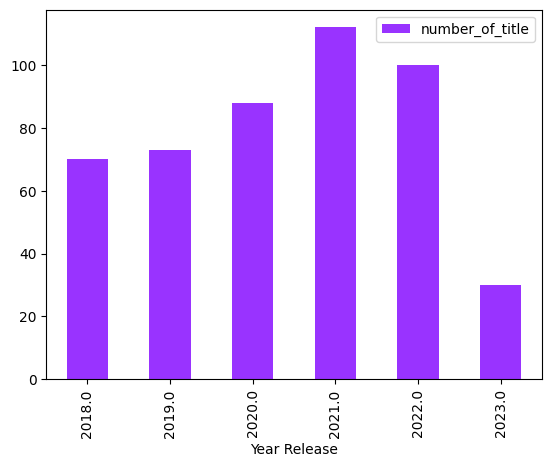

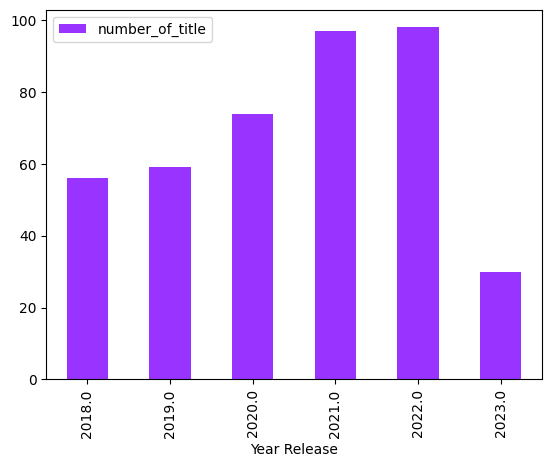

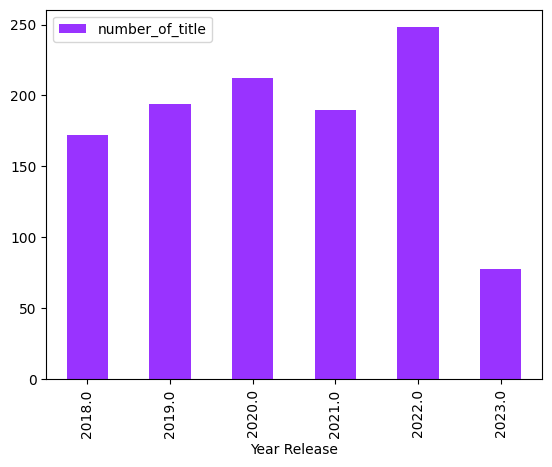

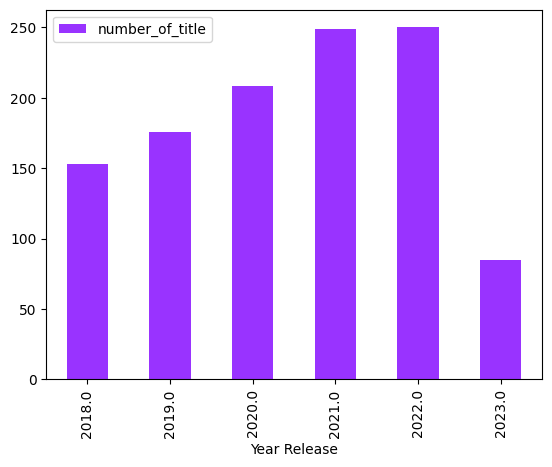

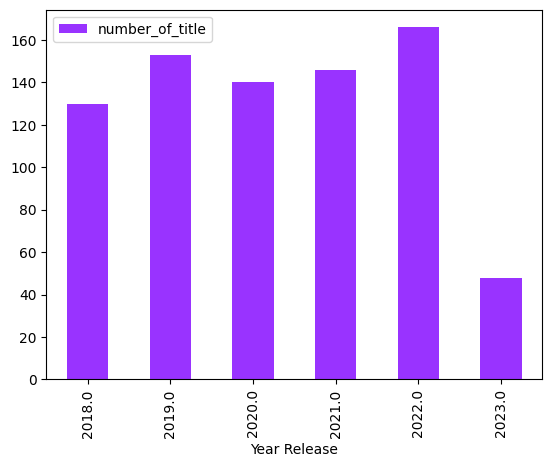

In [228]:
# Showing trend of tv-shows & movies was released each genre between 2018 - Jun 2023
g3.groupby("spl_Genre").plot(kind="bar",x="Year Release",y="number_of_title", stacked=True, color = "#9933ff")